# Подготовка данных

Очистка «грязных данных» – одна из основных проблем машинного обучения.

Очень важно следить за качеством полученных данных. Вам могут встретиться, например, следующие проблемы:

- Пропуски (пропущенные значения). Объекты или признаки, в которых есть пропуски, можно удалять из выборки, но если пропусков довольно много, мы можем потерять таким образом слишком много информации. Кроме того, наличие пропуска само по себе может нести информацию: скажем, это может говорить о систематической проблеме в сборе данных для того или иного сегмента выборки.

- Выбросы, то есть объекты, которые резко отличаются от большинства остальных. Например, в датасете с информацией о клиентах банка 140-летний человек, очевидно, будет весьма нетипичным. Выбросы могут возникать из-за ошибок при сборе данных или представлять собой реально существующие аномалии. Обычно выбросы лучше удалять, но в некоторых случаях выбросами могут быть важные объекты (например, очень богатые клиенты банка), и тогда их, возможно, стоит отлавливать и обрабатывать отдельно.

- Ошибки разметки. Если, например, вы собираете данные с помощью разметчиков-людей, то вы должны быть готовы к тому, что часть таргетов будет отмечена неправильно. Даже если не думать о том, что не все из разметчиков совершенно честные и старательные, задача может оказаться для них сложной.

- Data drift. С течением времени данные могут меняться. Например, может измениться схема сбора данных, и они начнут приходить в формате, который вообще не обрабатывается моделью. Или же может поменяться распределение данных: скажем, если вы делали образовательный сервис для студентов, а к вам стали приходить и более зрелые люди. Data drift – это суровая реальность для любой системы, которая решает не сиюминутную задачу, поэтому нужно уметь мониторить распределение данных и, если нужно, обновлять модель.

### Этапы подготовки данных

- Техническая очистка. Данные надо проверить на наличие типовых проблем: дубли, пропуски, противоречия.

- Семантическая очистка. Технически идеальные данные могут содержать смысловые ошибки. Например, выбросы. Для их очистки используются статистические методы.

- Обогащение/генерация данных. Данные желательно обогащать дополнительными аналитическими признаками. Это может улучшить качество работы моделей.

### Датасет с предскзанием сахарного диабет


Pregnancies 	To express the Number of pregnancies
Glucose 	To express the Glucose level in blood
BloodPressure 	To express the Blood pressure measurement
SkinThickness 	To express the thickness of the skin
Insulin 	To express the Insulin level in blood
BMI 	To express the Body mass index
DiabetesPedigreeFunction 	To express the Diabetes percentage
Age 	To express the age
Outcome 	To express the final result 1 is Yes and 0 is No


In [1]:
# подключим необходимые бибилиотеки
import pandas as pd
import numpy as np

In [2]:
#посмотрим на данные

# Самостоятельно загрузите датасет DataSet2_0.csv
data = pd.read_csv("./diabetes.csv", sep=',')
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [ ]:
# удалите безымянную колоку
data = data.drop(columns='Unnamed: 0')

Посмотрим, есть ли пропуски в данных:

In [4]:
#количество значений NA
# data.isna().sum()
# data['totalScanTimeInSeconds']=data['grandTotal']/data['valuePerSecond']
#количество значений
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Проверим на наличие дубликатов:

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
    # если есть дубликаты, удалим их
data = data.drop_duplicates()
data.shape


(768, 9)

Теперь поговорим о выбросах. Как их обнаружить? Есть множество вариантов, вы рассмотрим лишь некоторые.

In [7]:
#Посмотреть минимальные и максимальные значения в таблице

data.describe()

# Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.
# Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


16      0
736     0
713     0
727     0
681     0
       ..
691    13
298    14
455    14
88     15
159    17
Name: Pregnancies, Length: 768, dtype: int64


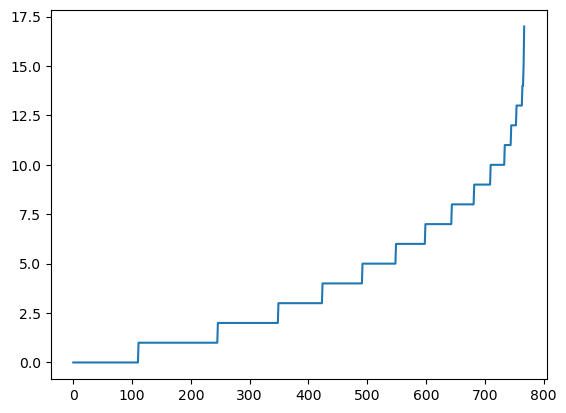

In [9]:
# для анализа можно использовать наглядные методы. Например, построим гистограмму:

import matplotlib.pyplot as plt
import seaborn as sns

a = data['Pregnancies'].sort_values()
print(a)
plt.plot(list(a))
plt.show()

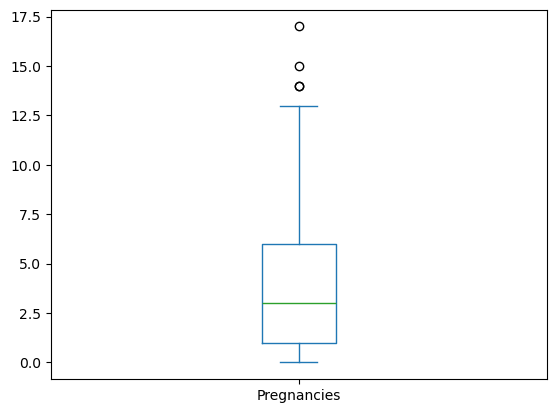

In [10]:

data.Pregnancies.plot.box()
plt.show()


In [22]:
#Если и этого не достаточно, можно реализовать фильтр Хэмпеля
def hampel(vals_orig):
    '''Опишем функцию, которая заменяет на nan все значения,
    у которых разница с медианой больше, чем три медианных абсолютных отклонения.'''
    vals = vals_orig.copy()
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

hampel(data['Pregnancies'])

0      6.0
1      1.0
2      8.0
3      1.0
4      0.0
      ... 
763    NaN
764    2.0
765    5.0
766    1.0
767    1.0
Name: Pregnancies, Length: 768, dtype: float64

In [ ]:
# запустите фильтр Хемпеля на всех колонках датафрейма
# есть ли плохие значения?


0

### Введение атрибутов

Введение новых атрибутов — это метод использования необработанных, неструктурированных атрибутов для их потенциального использования в анализе. Изменение пространства атрибутов часто является обязательной процедурой, т. к. не- обработанное пространство атрибутов, как правило, переполнено неструктурированными и неважными данными, что часто приводит к шуму. Введение новых  атрибутов — важный этап, на котором используются знания эксперта с целью обработки множества исходных данных с учетом особенностей рассматриваемой предметной области.

### Введенные вычислимые показатели

Придумайте хотя бы два показателя, которые более понятно будут описывать данные, чем уже заданные

In [23]:
data_mod = data.copy() #создадим новый датафрейм для работы с новыми показателями
# data_mod["ne_otm"] = data_mod["totalScanTimeInSeconds"] * data_mod["scannedLineItemsPerSecond"]
# data_mod["otm_i_ne_otm"] = data_mod["lineItemVoids"] + data_mod["ne_otm"]
# data_mod["sec_na_1_udach_scan"] = data_mod["totalScanTimeInSeconds"] / data_mod["otm_i_ne_otm"]
# data_mod["udach_i_neudach_scan"] = data_mod["otm_i_ne_otm"] + data_mod["scansWithoutRegistration"]
# data_mod["dolya_neudach_scan"] = data_mod["scansWithoutRegistration"] / data_mod["udach_i_neudach_scan"]
# data_mod["sec_na_1_scan"] = data_mod["totalScanTimeInSeconds"] / data_mod["udach_i_neudach_scan"]

# отношение давления к весу
data_mod["dav_k_ves"] = data_mod["BloodPressure"] / data_mod["BMI"]
data_mod["dav_k_age"] = data_mod["BloodPressure"]/ data_mod["Age"]
# отношение толщины кожи к возрасту
data_mod['skin_k_age'] = data_mod["SkinThickness"] / data_mod["Age"]
# отношение инсулина к проценту диабета
data_mod['insulin_k_diabet'] = data_mod['Insulin'] / data_mod["DiabetesPedigreeFunction"]


data_mod



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,dav_k_ves,dav_k_age,skin_k_age,insulin_k_diabet
0,6,148,72,35,0,33.6,0.627,50,1,2.142857,1.440000,0.700000,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,2.481203,2.129032,0.935484,0.000000
2,8,183,64,0,0,23.3,0.672,32,1,2.746781,2.000000,0.000000,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,2.348754,3.142857,1.095238,562.874251
4,0,137,40,35,168,43.1,2.288,33,1,0.928074,1.212121,1.060606,73.426573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,2.310030,1.206349,0.761905,1052.631579
764,2,122,70,27,0,36.8,0.340,27,0,1.902174,2.592593,1.000000,0.000000
765,5,121,72,23,112,26.2,0.245,30,0,2.748092,2.400000,0.766667,457.142857
766,1,126,60,0,0,30.1,0.349,47,1,1.993355,1.276596,0.000000,0.000000


### Уменьшение размерности данных


Теперь попробуем удалить колонки, если между ними есть явная корреляция.

In [26]:
# Убираем колонки с корреляцией >0.75
correlation_matrix = data_mod.corr() #строим корреляционную матрицу

high_correlation_columns = (correlation_matrix.abs() > 0.75).sum() > 1
high_correlation_columns = high_correlation_columns[high_correlation_columns].index.tolist()
print(high_correlation_columns)

# data = data.drop(columns=...)
# data

['SkinThickness', 'Insulin', 'skin_k_age', 'insulin_k_diabet']


**Убираем колонки у которых дисперсия около нуля**

В данном коде на Python мы используем класс VarianceThreshold из модуля sklearn.feature_selection для выявления и удаления признаков с низкой дисперсией.

По умолчанию он удаляет все признаки с нулевой дисперсией, то есть признаки, которые имеют одинаковое значение во всех выборках.

Значение порога 0.01 является всего лишь примером; вы можете настроить его в зависимости от вашего набора данных и конкретных потребностей. Выбранные имена признаков сохраняются в переменной important_feature_names, после чего набор данных фильтруется так, чтобы остались только эти важные признаки.

In [27]:
from sklearn.feature_selection import VarianceThreshold

data = data_mod.copy()

nImportant = VarianceThreshold(threshold=0.01)
nImportant.fit(data)

# Получаем название колонок, с значащами признаками
important_feature_names = data.columns[nImportant.get_support()]
#get_support - получение маски или целочисленного индекса выбранных элементов

# Отфильтруйте набор данных, чтобы включить в него только важные характеристики
data = data[important_feature_names]
data

ValueError: Input X contains infinity or a value too large for dtype('float64').

### Проверка значимости качества данных

Для того, чтобы воочию увидеть результаты проделанной нами работы, построим на наших данных модель и сравним качество модели на исходных данных и на модифицированных.

Используем метод опорных векторов(SVM).

##### Support Vector Machine

svm.LinearSVC([penalty, loss, dual, tol, C, ...])

**Метод опорных векторов** (англ. support vector machine, SVM) — один из наиболее популярных методов обучения, который применяется для решения задач классификации и регрессии. Основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом (как и у многих других подобных методов).

Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

Подробнее о моделях мы поговорим на семинаре 4.

Строгий вывод постановки задачи SVM можно прочитать [тут](https://www.mit.edu/~9.520/spring08/Classes/class05.pdf) или в [лекции К.В. Воронцова.](http://machinelearning.ru/wiki/images/archive/a/a0/20150316112120!Voron-ML-Lin-SVM.pdf)


В нашей задаче мы проделаем классификацию по колонке "fraud", которая имеет только 2 класса: 0 и 1.
Соответственно, мы обсуждаем с вами обсуждаем **двухклассовую** классификацию.

Напомним, что входные переменные, описывающие рассматриваемые объекты, называют **предикторами** (независимыми переменными) и обозначают *X1,X2, ...,Xp*.

Предикторы также часто называют признаками, а конкретные их значения чаще обозначают маленькими буквами *x1, x2, ..., xp.*

Выходную переменную, основывающуюся на некоторых значениях предикторов, называют **откликом** или **зависимой переменной** и обозначают *Y*.


In [ ]:
n = data.shape[0] #количество строк в датафрейме
t = round(n * 0.8)
X = data.drop(columns=["fraud"]) #убираем колонку fraud
y = data["fraud"] #и выделяем в отдельную переменную. X - признаки, Y - это наш отклик.
X_mod = data_mod.drop(columns=["fraud"])
y_mod = data_mod["fraud"]

#Разбиваем данные на обучающую и тестовую выборки в отношении 80/20
#Если это делать вручную, то получится что-то такое:
# data_train = X[:t]
# data_test = X[t:]
# y_train = y[:t]
# y_test = y[t:]

# data_train_mod = X_mod[:t]
# data_test_mod = X_mod[t:]
# y_train_mod = y_mod[:t]
# y_test_mod = y_mod[t:]

In [ ]:
#но можно сделать проще:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# проделайте то же самое для data_mod

X_mod_train, X_mod_test, y_mod_train, y_mod_test = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42)

#### Метод опорных векторов в задаче классификации



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Теперь применим нашу модель к тестовой выборке

In [ ]:
res_raw_data = svm_classifier.predict(X_test)
res_raw_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Оценим качество работы модели.
В данном случае мы используем самую простую метрику оценки качества модели - Accuracy.

Что такое Accuracy наглядно:

![image.png](attachment:image.png)

$accuracy = \frac {TP + TN} {TP + TN + FP + FN}$

Другие метрики мы рассмотрим на следующих практических занятиях.

In [ ]:
accuracy_raw = accuracy_score(y_test, res_raw_data)
print("Accuracy on raw data:", accuracy_raw)

Accuracy on raw data: 0.9574468085106383


А теперь, проделаем то же самое, но на модифицированных данных:

In [ ]:
# проделайте самостоятельно
...
svm_classifier.fit(X_mod_train, y_mod_train)
res_mod_data = svm_classifier.predict(X_mod_test)

res_mod_data

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_mod = accuracy_score(y_mod_test, res_mod_data)
print("Accuracy on modified data:", accuracy_mod)

Accuracy on modified data: 0.9601063829787234


Теперь попробуйте проделать то же самое сами на другом датасете!

(задание см. в Readme https://github.com/annaprovorova/HSE_ML_course_2024-2025/tree/main)